<div style="display: flex; justify-content: center;">
    <img src="IA/tosti.jpg" style="border-radius: 20px; width: 75%;">
</div>

<small> Imagen creada por IA generativa usando el siguiente pront: 'Dibújame un robot (con cabeza de tostadora) pensativo, sentado en una mesa.  
 El dibujo no debe ser muy recargado, solo el robot y parte de la mesa.'<small>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
from scipy.stats import ttest_ind 
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### La hipótesis que trataré de demostrar en este Jupyter es que el tiempo que un vehículo pasa en el depósito  
### está influenciado por el tipo de vehículo del que se trate.

>Lo primero será, obviamente, cargar los dataframes que había creado en el Jupyter 'preparacion_datos_salida.ipynb'.

In [2]:
df_salidas_todo = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\df_salidas_todo')
df_salidas_todo.head(5) 
df_salidas_todo_copia = df_salidas_todo.copy()

In [3]:
df_salidas_todo_copia.tail(5)

,tipoVehiculo,motivo,turno,grua,tipoVia,via,numero,cp,depositoEntrada,fechaEntrada,depositoSalida,fechaSalida,TiempoEnDeposito (dias)
idVehiculo,,,,,,,,,,,,,
M320230302121512,Motocicleta,Sustraído,Mañana,S373,CAMINO,PERALES,173,28053,MEDIODIA 3,2023-03-02 12:00:00,MEDIODIA 3,2023-03-02 19:00:00,0 days 07:00:00
M320220607093759,Coche,Prohibido Placas,Mañana,S363,CAMINO,PERALES,23,28053,MEDIODIA 3,2022-06-07 09:36:00,MEDIODIA 3,2023-01-25 17:35:00,232 days 07:59:00
M320220607112625,Coche,Falta de documentación,Mañana,S335,CAMINO,PERALES,0,28053,MEDIODIA 3,2022-06-07 11:25:00,MEDIODIA 3,2023-02-15 10:56:00,252 days 23:31:00
PI20230202122016,Coche,Prohibido Placas,Mañana,S331,PUERTO,BALBARAN,133,28018,PASEO IMPERIAL,2023-02-02 12:15:00,PASEO IMPERIAL,2023-02-02 17:52:00,0 days 05:37:00
CO20230916170349,Motocicleta,R Minusválido,Tarde,S367,CAMINO,DE HORTALEZA,0,None,COLON,2023-09-16 17:02:00,COLON,2023-09-21 08:28:00,4 days 15:26:00


### También cargaré los DataFrames de cada año, por si en algún momento hacen falta.

In [4]:
años = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
for año in años:
    print(f"#Año {año}")
    print(f"df_salidas{año} = pd.read_parquet(r'C:\\Users\\pepea\\Desktop\\the_drige\\EDA\\Dataset\\salidas_validas\\salidas{año}_util.parquet')") 
                                
    print()

#Año 2016
df_salidas2016 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2016_util.parquet')

#Año 2017
df_salidas2017 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2017_util.parquet')

#Año 2018
df_salidas2018 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2018_util.parquet')

#Año 2019
df_salidas2019 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2019_util.parquet')

#Año 2020
df_salidas2020 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2020_util.parquet')

#Año 2021
df_salidas2021 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2021_util.parquet')

#Año 2022
df_salidas2022 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2022_util.parquet')

#Año 2023
df_salidas2023 = pd.read_parquet(r'C:\Users\pepea\De

In [5]:
#Año 2016
df_salidas2016 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2016_util.parquet')

#Año 2017
df_salidas2017 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2017_util.parquet')

#Año 2018
df_salidas2018 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2018_util.parquet')

#Año 2019
df_salidas2019 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2019_util.parquet')

#Año 2020
df_salidas2020 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2020_util.parquet')

#Año 2021
df_salidas2021 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2021_util.parquet')

#Año 2022
df_salidas2022 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2022_util.parquet')

#Año 2023
df_salidas2023 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\salidas_validas\salidas2023_util.parquet')

#### La media del tiempo que un vehículo, sin importar qué tipo de vehículo se trate, es un dato importante y fácil.  
#### Guardaré ese dato en la variable 'media_tiempo'.

In [6]:
media_tiempo = df_salidas_todo_copia['TiempoEnDeposito (dias)'].mean()

print("De media, un vehículo pasa en el depósito:", media_tiempo)


De media, un vehículo pasa en el depósito: 30 days 09:03:18.898575959


#### Para generar una figura que visualmente muestre las diferencias de tiempo que cada tipo de vehículo pasa, en promedio,  
### en el depósito, crearé una tabla con esos datos.

> Además, los pasaré a tipo float para poder operar con facilidad.

In [7]:
df_media_tiempo = df_salidas_todo_copia.groupby('tipoVehiculo')['TiempoEnDeposito (dias)'].mean().reset_index()
df_media_tiempo = df_media_tiempo.reset_index(drop=True).set_index('tipoVehiculo')
df_media_tiempo = df_media_tiempo.rename(columns={'TiempoEnDeposito (dias)': 'Tiempo medio en deposito'})

df_media_tiempo

,Tiempo medio en deposito
tipoVehiculo,
Bicicletas,127 days 06:37:01.208053692
Camión,41 days 17:06:22.496313381
Coche,27 days 02:16:28.668850614
Motocarro,26 days 17:06:51.864406779
Motocicleta,45 days 09:35:49.491698748
Patinetes (VMP),22 days 21:12:52.217756668
Remolque,62 days 13:03:06.976744186
Vehículo pesado,24 days 09:02:32.093023255


In [8]:
df_media_tiempo['Tiempo medio en deposito (float)'] = df_media_tiempo['Tiempo medio en deposito'].dt.days + df_media_tiempo['Tiempo medio en deposito'].dt.seconds / (24 * 3600)
df_media_tiempo

,Tiempo medio en deposito,Tiempo medio en deposito (float)
tipoVehiculo,,
Bicicletas,127 days 06:37:01.208053692,127.275706
Camión,41 days 17:06:22.496313381,41.712755
Coche,27 days 02:16:28.668850614,27.094769
Motocarro,26 days 17:06:51.864406779,26.713090
Motocicleta,45 days 09:35:49.491698748,45.399873
Patinetes (VMP),22 days 21:12:52.217756668,22.883935
Remolque,62 days 13:03:06.976744186,62.543819
Vehículo pesado,24 days 09:02:32.093023255,24.376759


In [9]:
df_media_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Bicicletas to Vehículo pesado
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   Tiempo medio en deposito          8 non-null      timedelta64[ns]
 1   Tiempo medio en deposito (float)  8 non-null      float64        
dtypes: float64(1), timedelta64[ns](1)
memory usage: 192.0+ bytes


#### La primera figura será un gráfico de barras donde en el eje X estarán los distintos tipos de vehículos,  
### en el eje Y estará el tiempo en depósito. Además, habrá una línea horizontal indicando el tiempo medio en el depósito.

In [10]:
linea_media_tiempo = media_tiempo.days + media_tiempo.seconds / (24 * 3600)

linea_media_tiempo

30.377291666666668

>Necesitamos que la media esté en números.

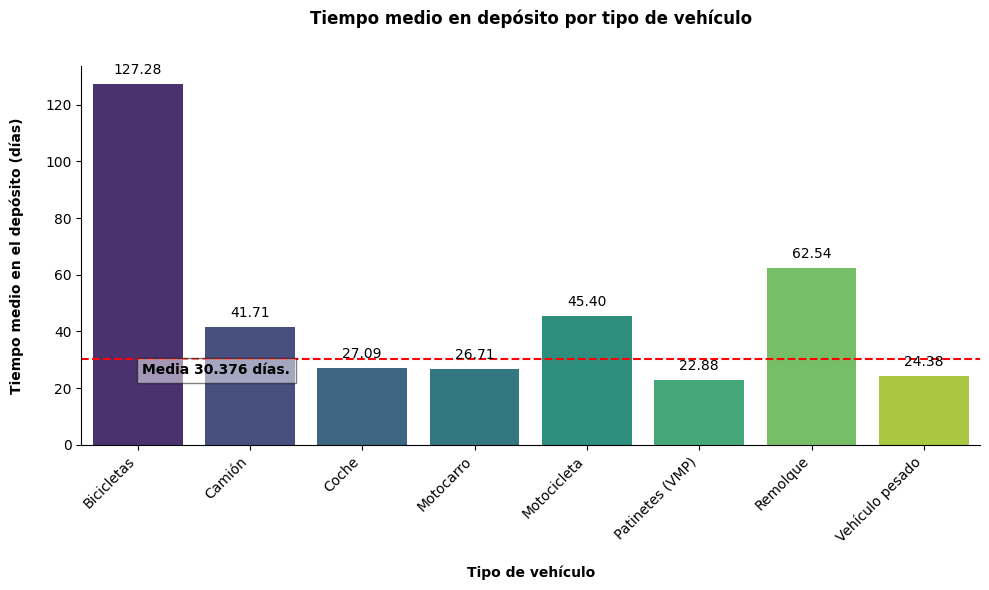

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_media_tiempo.index, y='Tiempo medio en deposito (float)', hue=df_media_tiempo.index, data=df_media_tiempo, palette='viridis', dodge=False)

plt.xlabel('Tipo de vehículo', labelpad=15, fontweight='bold')
plt.ylabel('Tiempo medio en el depósito (días)', labelpad=15, fontweight='bold')
plt.title('Tiempo medio en depósito por tipo de vehículo', fontweight='bold', pad=30)

plt.xticks(rotation=45, ha='right')

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points') 

plt.text(df_media_tiempo.index.get_loc('Bicicletas') + 0.7, 23.8, 'Media 30.376 días.', ha='center', va='bottom', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
plt.axhline(y=linea_media_tiempo, color='r', linestyle='--', label='Media')
plt.tight_layout()
sns.despine()
plt.savefig(r"C:\Users\pepea\Desktop\the_drige\EDA\imagenes\figura_segunda_hipo/tiempoEnDeposito.png")
plt.show()

>Al ver la gráfica, parece que mi idea era errónea. Pensé que los camiones y vehículos pesados pasarían menos tiempo en el depósito que los coches.  
La diferencia entre los tipos de vehículos y que para esta hipótesis se compara una variable categórica (tipo de vehículo) y una  
variable numérica (tiempo en el depósito) hacen que realizar un estudio ANOVA sea lo adecuado.

#### Prepararé un dataframe solo con las columnas que nos interesan para realizar el ANOVA con facilidad.

In [12]:
df_salidas_todo_copia.head()

,tipoVehiculo,motivo,turno,grua,tipoVia,via,numero,cp,depositoEntrada,fechaEntrada,depositoSalida,fechaSalida,TiempoEnDeposito (dias)
idVehiculo,,,,,,,,,,,,,
321,Camión,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1995-11-29,Mediodía 2,2016-07-26 09:59:00,7545 days 09:59:00
528,Coche,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1996-05-08,Mediodía 2,2016-05-18 17:11:00,7315 days 17:11:00
592,Coche,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1996-05-14,Mediodía 2,2016-11-25 14:21:00,7500 days 14:21:00
162,Coche,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1997-02-27,Mediodía 2,2016-06-29 18:55:00,7062 days 18:55:00
217,Coche,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1997-04-30,Vicálvaro,2016-08-08 12:58:00,7040 days 12:58:00


In [13]:
df_anova = df_salidas_todo_copia[["tipoVehiculo", "TiempoEnDeposito (dias)"]]
df_anova['Tiempo en deposito (float)'] = df_anova['TiempoEnDeposito (dias)'].dt.days + df_anova['TiempoEnDeposito (dias)'].dt.seconds / (24 * 3600) 


C:\Users\pepea\AppData\Local\Temp\ipykernel_344\2905714637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anova['Tiempo en deposito (float)'] = df_anova['TiempoEnDeposito (dias)'].dt.days + df_anova['TiempoEnDeposito (dias)'].dt.seconds / (24 * 3600)


In [14]:
df_anova.head(3)

,tipoVehiculo,TiempoEnDeposito (dias),Tiempo en deposito (float)
idVehiculo,,,
321,Camión,7545 days 09:59:00,7545.415972
528,Coche,7315 days 17:11:00,7315.715972
592,Coche,7500 days 14:21:00,7500.597917


## ANOVA

In [15]:
anova_segunda_hipotesis = f_oneway(
    df_anova[df_anova['tipoVehiculo'] == 'Bicicletas']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Camión']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Coche']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Motocarro']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Motocicleta']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Patinetes (VMP)']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Remolque']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Vehículo pesado']['Tiempo en deposito (float)']
)


print("El valor de p es muy pequeño (",anova_segunda_hipotesis.pvalue,"), lo que sugiere una alta significancia")
print("estadística y el rechazo de la hipótesis nula. Además, la estadística F (",anova_segunda_hipotesis.statistic,") es")
print("sustancialmente mayor que 1, indicando una diferencia significativa en los tiempos de permanencia entre")
print("al menos dos tipos de vehículos en el depósito.")


El valor de p es muy pequeño ( 1.2581579809780119e-139 ), lo que sugiere una alta significancia
estadística y el rechazo de la hipótesis nula. Además, la estadística F ( 95.28800497120615 ) es
sustancialmente mayor que 1, indicando una diferencia significativa en los tiempos de permanencia entre
al menos dos tipos de vehículos en el depósito.


Después de realizar la prueba de Análisis de Varianza (ANOVA) y encontrar una relación significativa entre los grupos,  
llevaré a cabo la prueba de Tukey como análisis post hoc. El término 'post hoc' significa 'después de esto' y se refiere  
a las pruebas o análisis realizados después de la prueba de hipótesis inicial para investigar y comprender mejor  
las diferencias específicas entre los grupos.

In [16]:
tukey_primera_hipotesis = pairwise_tukeyhsd(df_anova['Tiempo en deposito (float)'], df_anova['tipoVehiculo'])



In [17]:
print(tukey_primera_hipotesis)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------
     Bicicletas          Camión  -85.5629    0.0 -107.0468 -64.0791   True
     Bicicletas           Coche -100.1809    0.0 -121.4522 -78.9097   True
     Bicicletas       Motocarro -100.5626 0.0004 -171.3519 -29.7733   True
     Bicicletas     Motocicleta  -81.8758    0.0 -103.3112 -60.4405   True
     Bicicletas Patinetes (VMP) -104.3918    0.0 -126.7643 -82.0193   True
     Bicicletas        Remolque  -64.7319 0.2434 -146.6329  17.1691  False
     Bicicletas Vehículo pesado -102.8989    0.0 -162.7285 -43.0694   True
         Camión           Coche   -14.618    0.0  -17.9726 -11.2633   True
         Camión       Motocarro  -14.9997 0.9977  -82.6008  52.6015  False
         Camión     Motocicleta    3.6871 0.1504   -0.5865   7.9607  False
         Camión Patinetes

Los resultados de la prueba de **Tukey** muestran que hay diferencias significativas en el tiempo que pasan en el depósito entre los diferentes tipos de vehículos.  
Esto puede sugerir que el tipo de vehículo influye en el tiempo que pasa en el depósito, por lo que podemos decir que la hipótesis se cumple. 

Los resultados de el **análisis de Tukey** muestran que hay diferencias significativas:

- Se encontraron diferencias significativas entre el grupo de **Bicicletas** y todos los otros tipos de vehículos.  

- También hubo diferencias significativas entre algunos otros grupos:   
    **Camión** y **Coche**  
    **Camión** y **Patinetes (VMP)**  
    **Coche** y **Motocicleta**  
    **Motocicleta** y **Patinetes (VMP)**  

- No hubo diferencias significativas entre:   
    **Bicicletas** y **Remolque**    
    **Camión** y **Motocarro**    
    **Camión** y **Motocicleta**    
    **Coche** y **Motocarro**    
    **Coche** y **Patinetes (VMP)**    
    **Motocarro** y **Patinetes (VMP)**    
    **Motocarro** y **Vehículo pesado**    
    **Motocicleta** y **Remolque**    
    **Motocicleta** y **Vehículo pesado**    
    **Patinetes (VMP)** y **Vehículo pesado**.


En resumen, el análisis muestra qué hay algunos tipos de vejiculos que tienen **diferencias significativas** en sus **medias** aunque algunos no.





Ya sabemos, o por lo menos intuimos, con fundamento, que el tipo de vehículo del que se trate y el tiempo que este pasará en el depósito guardan relación.  
Para profundizar en la reacion entre  tipo de vehículo y tiempo en el depósito, haré un ****boxplot****. Con este, vemos cómo están repartidos ****los valores extremos****, la mediana, la media y, en general, qué tan ****homogéneo**** (o lo contrario) es cada grupo estudiado (tipo de vehículo en este caso).

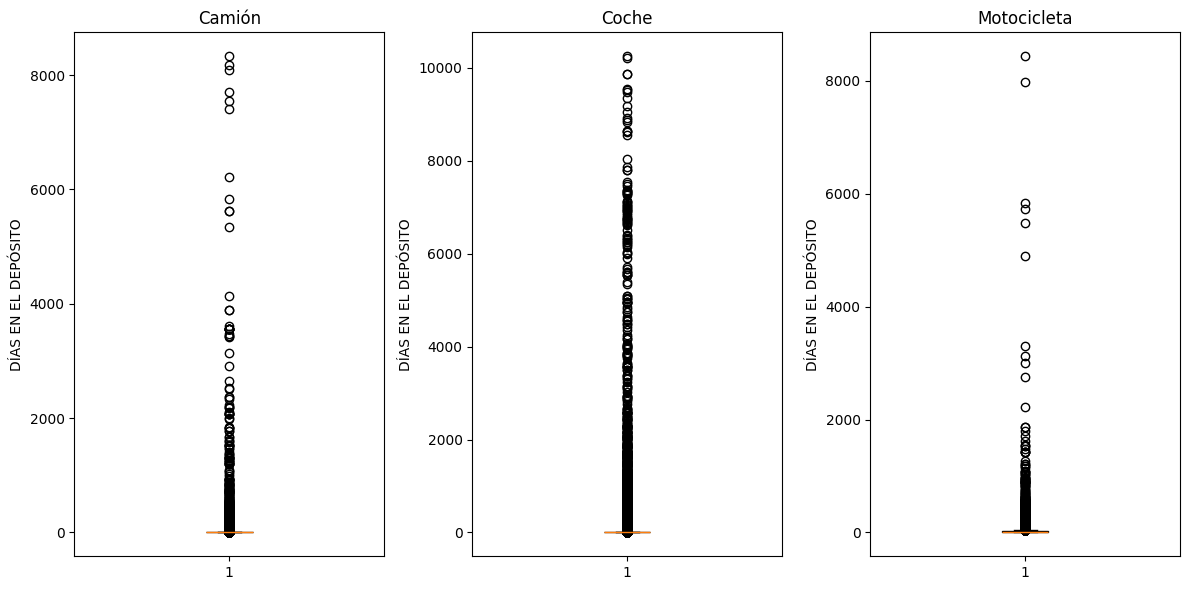

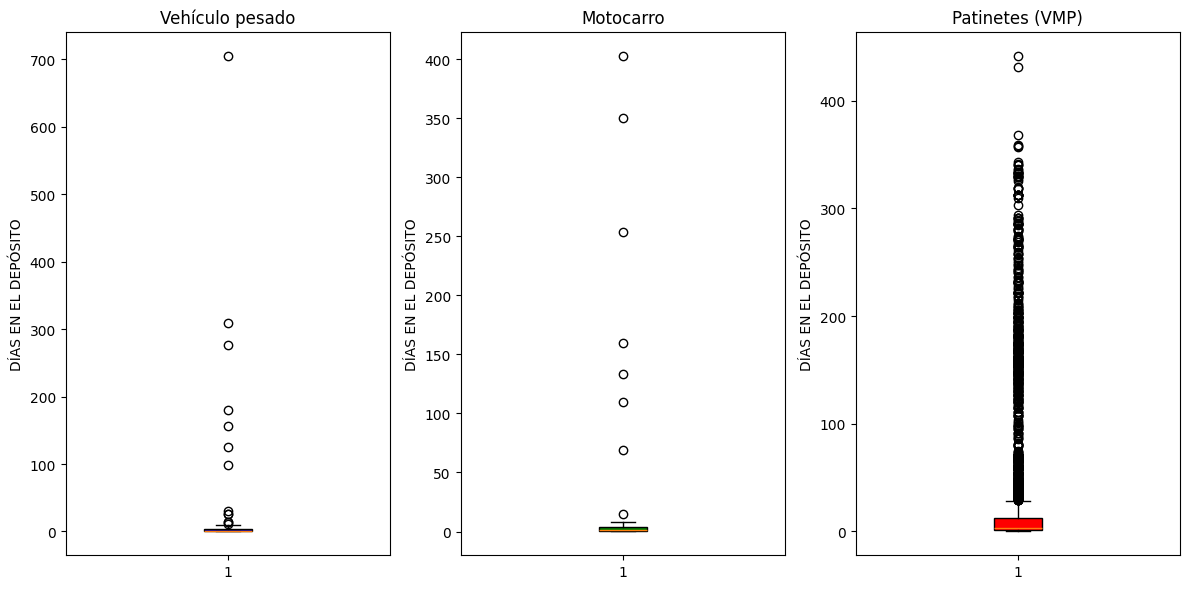

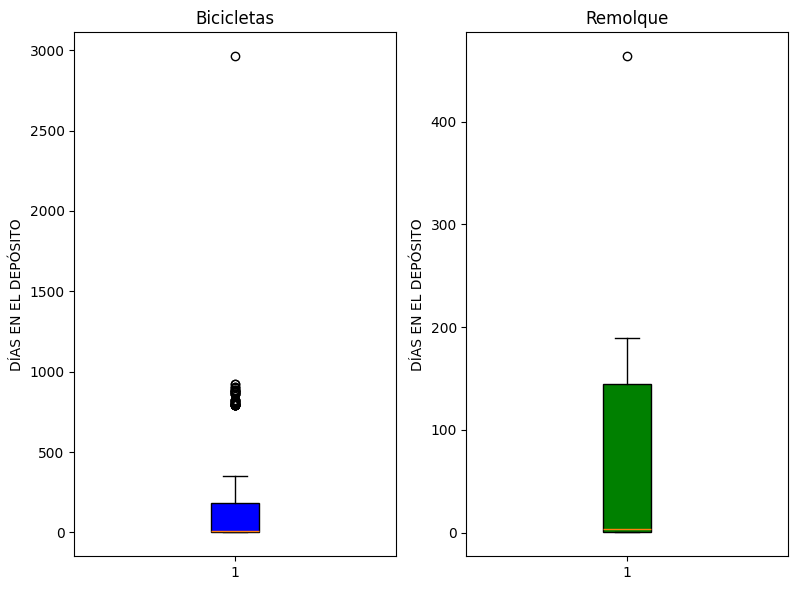

In [18]:
tipos_vehiculos = df_anova['tipoVehiculo'].unique()

# Colores para cada tipo de vehículo
colores = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

# Dividir la lista en grupos de tres
grupos_de_tres = [tipos_vehiculos[i:i+3] for i in range(0, len(tipos_vehiculos), 3)]

# Dibujar los boxplots de tres en tres
for grupo in grupos_de_tres:
    plt.figure(figsize=(12, 6))
    for i, vehiculo in enumerate(grupo, start=1):
        datos_vehiculo = df_anova[df_anova['tipoVehiculo'] == vehiculo]['Tiempo en deposito (float)']
        plt.subplot(1, 3, i)
        plt.boxplot(datos_vehiculo, patch_artist=True, boxprops=dict(facecolor=colores[i-1]))
        plt.title(vehiculo)
        plt.ylabel('DÍAS EN EL DEPÓSITO')
    plt.tight_layout()
    nombre_archivo = '_'.join(grupo)
    ruta_directorio = r"C:\Users\pepea\Desktop\the_drige\EDA\imagenes\figura_segunda_hipo"
    if not os.path.exists(ruta_directorio):
        os.makedirs(ruta_directorio)
    plt.savefig(os.path.join(ruta_directorio, f"{nombre_archivo}.png"))
    plt.show()

Viendo los gráficos boxplot, se observa que en general las cajas son muy estrechas, excepto en el caso del remolque,  
y que la mediana está algo desplazada hacia abajo. También hay muchos valores extremos, lo cual dificulta la lectura de la caja.  
Teniendo en cuenta la gran cantidad de datos con los que está hecho este estudio, esto es algo normal.  
Esto se puede interpretar de la siguiente manera:

- **Mediana desplazada hacia abajo:** La mediana está más cerca de los valores más bajos de los datos en comparación con la media.  
Esto puede indicar que hay algunos valores extremadamente bajos que están afectando la mediana, pero no afectan tanto a la media.

- **Muchos puntos por encima de la caja:** Esto sugiere una concentración de datos por encima de la mediana. Puede indicar que hay una  
cantidad significativa de valores altos que están inflando la mediana, pero no están influyendo tanto en la media.

- **Caja estrecha:** Indica que la dispersión de los datos (la variabilidad) dentro del rango intercuartílico es baja.  
Esto podría ser debidoa que la mayoría de los datos se concentran en un rango relativamente estrecho alrededor de la mediana,  
pero hay algunos valores extremos que están extendiendo los bigotes.


<img src="./IA/tosti2.jpg" width=600><sub><sup>  

<small>Imagen creada por IA generativa usando el siguiente pront: 'Dibújame un robot (con cabeza de tostadora) pensativo,  
sentado en una mesa, diciendo adios, el dibujo no debe ser muy recargado, solo el robot y parte de la mesa'<small>